В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). 

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Распределение хи-квадрат $\chi^2_k$

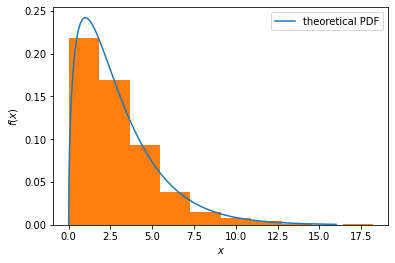

In [92]:
# зададим степень свободы
k = 3
# зададим значения х
x = np.linspace(0,16, 1000)#определяем массив точек для построения плотности распределения
# распределение Хи-квадрат
rv = sts.chi2(k)
#генерим случайную выборку 1000 значений
sample = rv.rvs(1000)
# плотность распределения
cdf = rv.cdf(x)
# плотность вероятности распределения
pdf = rv.pdf(x)
# построим функции
plt.plot(x, pdf, label='theoretical PDF')
plt.hist(sample, density = True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()


Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

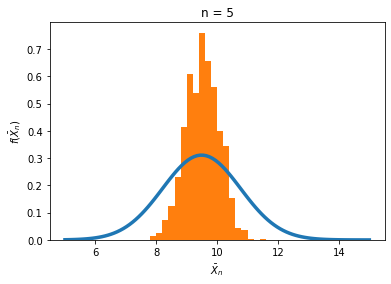

In [119]:
n = 5
means = list()  
for i in range(1, 1001):
  # сгенерируем 1000 значений
  sample = rv.rvs(n)
  s_mean = np.mean(sample)
  means.append(s_mean)
#сгенерируем выборку из нормально распределённой случайной величины с параметрами mu и sigma
#E(y)=n
mu = 9.488
#D(y)= 11.31
sigma = math.sqrt(sts.chi2.ppf(0.8,1))

# зададим нормально распределенную случайную величину
rv = sts.norm(loc=mu, scale=sigma) #определяем нормальное распределение с расчетными характеристиками
x = np.linspace(5,15,100)
pdf = rv.pdf(x) #плотность распределения
plt.plot(x, pdf, linewidth=3.5)
plt.hist(means,bins=50, range=(5,15), density=True) #строим гистограмму расп. выборочных сердних 
plt.xlabel('$\\bar{X}_n$')
plt.ylabel('$f(\\bar{X}_n)$')
plt.title('n = %d' % n)
plt.show()


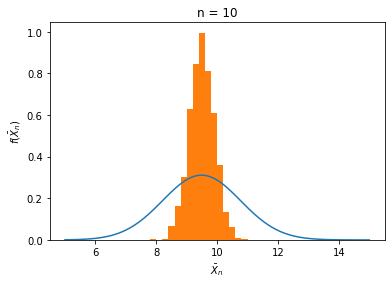

In [120]:
n = 10
means = list()  
for i in range(1, 1001):
  # сгенерируем 1000 значений
  sample = rv.rvs(n)
  s_mean = np.mean(sample)
  means.append(s_mean)
#сгенерируем выборку из нормально распределённой случайной величины с параметрами mu и sigma
#E(y)=n
mu = 9.488
#D(y)= 11.31
sigma = math.sqrt(sts.chi2.ppf(0.8,1))
# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma) #определяем нормальное распределение с расчетными характеристиками
x = np.linspace(5, 15,100)
pdf = norm_rv.pdf(x) #плотность распределения
plt.plot(x, pdf)
plt.hist(means, bins =50, range=(5,15), density=True) #строим гистограмму расп. выборочных сердних и приблежения плотностями норм. расп. 
plt.xlabel('$\\bar{X}_n$')
plt.ylabel('$f(\\bar{X}_n)$')
plt.title('n = %d' % n)
plt.show()

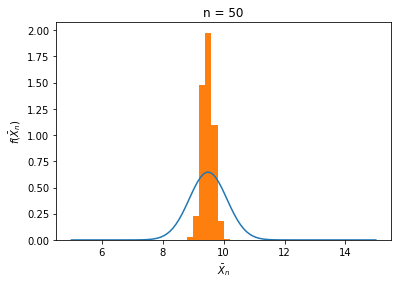

In [118]:
n = 50
means = list()  
for i in range(1, 1001):
  # сгенерируем 1000 значений
  sample = rv.rvs(n)
  s_mean = np.mean(sample)
  means.append(s_mean)
#сгенерируем выборку из нормально распределённой случайной величины с параметрами mu и sigma
#E(y)=n
mu = 9.488
#D(y)= 9.488 * 2
sigma = (9.488 * 2 / n) ** 0.5
# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma) #определяем нормальное распределение с расчетными характеристиками
x = np.linspace(5, 15,100)
pdf = norm_rv.pdf(x) #плотность распределения
plt.plot(x, pdf)
plt.hist(means, bins =50, range=(5, 15), density=True) #строим гистограмму расп. выборочных сердних 
plt.xlabel('$\\bar{X}_n$')
plt.ylabel('$f(\\bar{X}_n)$')
plt.title('n = %d' % n)
plt.show()

При увеличении выборочных средних распределений гистограммы распределение вытягивается и устанавливает наиболее точное значение.